<a href="https://colab.research.google.com/github/jishnuvijayan616/AGN-Arima/blob/main/Copy_of_AGN_histogram.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd


In [3]:
from google.colab import files
uploaded = files.upload()


Saving mjd_flux (1).csv to mjd_flux (1).csv


In [4]:
import io

In [5]:
agn = pd.read_csv(io.BytesIO(uploaded['mjd_flux (1).csv']),index_col= 'MJD',engine='python')

In [6]:
import numpy as np

import pandas as pd
import matplotlib.pyplot as plt
from pandas import datetime
#import copy
from pylab import rcParams
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.stattools import acf,pacf
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.stattools import adfuller
from scipy import signal
import warnings
warnings.filterwarnings('ignore')
import math
import statsmodels.api as sm
rcParams['figure.figsize']=20,10

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  """
/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
def fig(data,window_size, figsize=(20, 10),color="green",linestyle="",xlabel="MJD",ylabel="Total arrivals",title=None,heading='Flux Variation with time'):
    plt.figure(figsize=figsize)
    plt.plot(data, color=color, label=heading)
    movingAverage=data.rolling(window=window_size).mean()
    movingstd=data.rolling(window=window_size).std()
    print ('Mean : ' + str(np.mean(movingAverage)))
    print ('STD : ' + str(np.mean(movingstd)))
    plt.plot(movingAverage,color='red',label='Rolling mean')
    plt.plot(movingstd,color='blue',label='Rolling std')
    plt.xlabel(xlabel,size = 20)
    plt.ylabel(ylabel, size=18)
    plt.legend(loc=2)
    plt.title(title)

    plt.show(block=False)

        
def pacf_acf(data,figsize=(20, 10),linestyle="-",title=None):
    plt.figure(figsize=figsize)
    #plotting Autocorrelation function over 25 lags
    #ACF gives "Indirect correlation" between correlated data points
    plot_acf(data, lags=25,title = 'Autocorrelation')
    #plotting Partial Auto correlation function over 25 lags
    #PACF gives actual direct correlation between correlated data points.
    plot_pacf(data, lags=25, title = 'Partial Autocorrelation')
    
def inverse_difference(last_ob, value):
	return value + last_ob

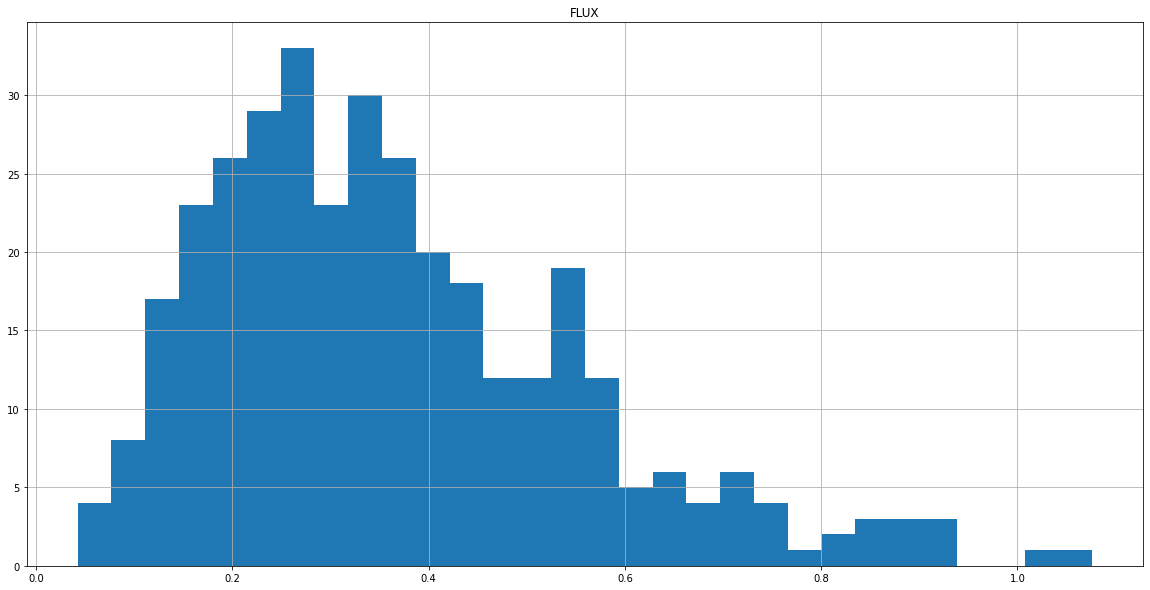

In [ ]:
h= agn.hist(bins=30)


In [7]:
from scipy.optimize import curve_fit

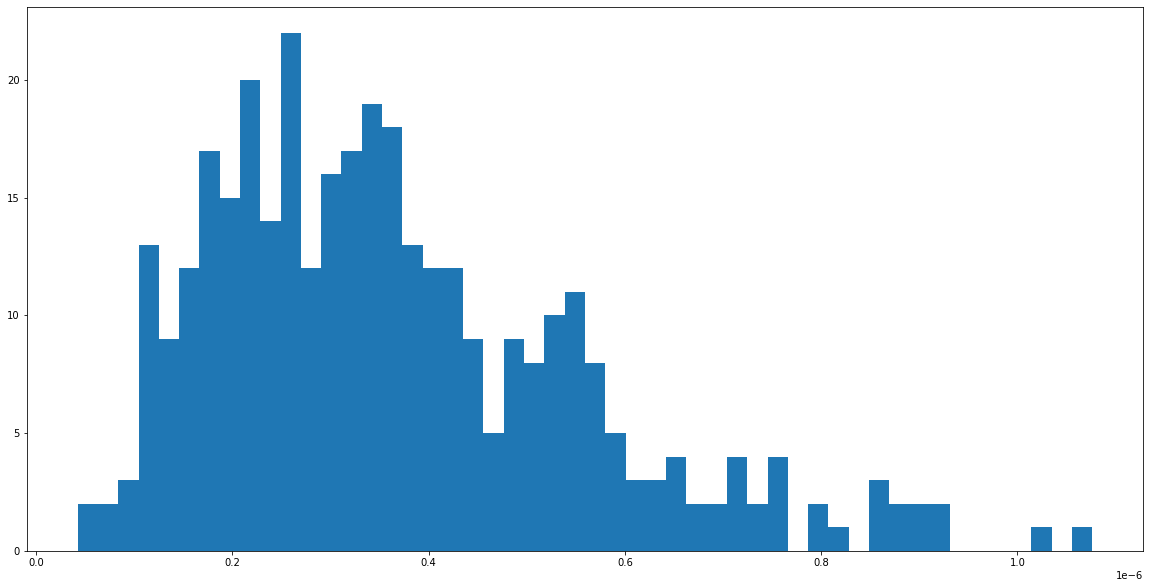

In [ ]:
h = plt.hist(agn['FLUX'],bins=50)

In [ ]:
h[0]

array([ 2.,  2.,  3., 13.,  9., 12., 17., 15., 20., 14., 22., 12., 16.,
       17., 19., 18., 13., 12., 12.,  9.,  5.,  9.,  8., 10., 11.,  8.,
        5.,  3.,  3.,  4.,  2.,  2.,  4.,  2.,  4.,  0.,  2.,  1.,  0.,
        3.,  2.,  2.,  2.,  0.,  0.,  0.,  0.,  1.,  0.,  1.])

In [ ]:
c =h[0]

In [8]:
from scipy.stats import chisquare,norm

In [ ]:
chisquare(agn['FLUX'])

Power_divergenceResult(statistic=3.467969317407118e-05, pvalue=1.0)

In [ ]:
df = sum(c)-1
df

350.0

In [ ]:
af = agn['FLUX'] * 1000000

In [ ]:
m = af.mean()
std = af.std(ddof=1)
print(m,std)

0.36626805305755 0.19050357101640042


In [ ]:
bins = [-float('inf')]
for i in range(9):
  p = (i+1)/10; z= norm.ppf(p); bound = m + z*std
  print (p,z,'  ', bound)
  bins.append(bound)
bins.append(float('inf')) 

0.1 -1.2815515655446004    0.1221279033796451
0.2 -0.8416212335729142    0.2059362026186818
0.3 -0.5244005127080409    0.26636788274383694
0.4 -0.2533471031357997    0.31800452520351985
0.5 0.0    0.36626805305755
0.6 0.2533471031357997    0.41453158091158016
0.7 0.5244005127080407    0.466168223371263
0.8 0.8416212335729143    0.5265999034964182
0.9 1.2815515655446004    0.6104082027354549


In [ ]:
freq = []
for i in range (10):
  obs,exp = sum(num >=bins[i] and num < bins[i+1]
                for num in score), 350*.1
  print(obs,exp)
  freq.append((obs,exp))            
              

NameError: ignored

In [9]:
import pylab as plb
from scipy.optimize import curve_fit



1.9050357101640039e-07

[1. 1. 1.]


In [123]:
#agn['FLUX']= 1000000*agn['FLUX']
ag = np.log10(agn['FLUX'])
g = agn['FLUX']

In [124]:
def gaussian(ag,mean,amplitude,standard_deviation):
  return amplitude*np.exp(-((ag-mean)/standard_deviation)**2)



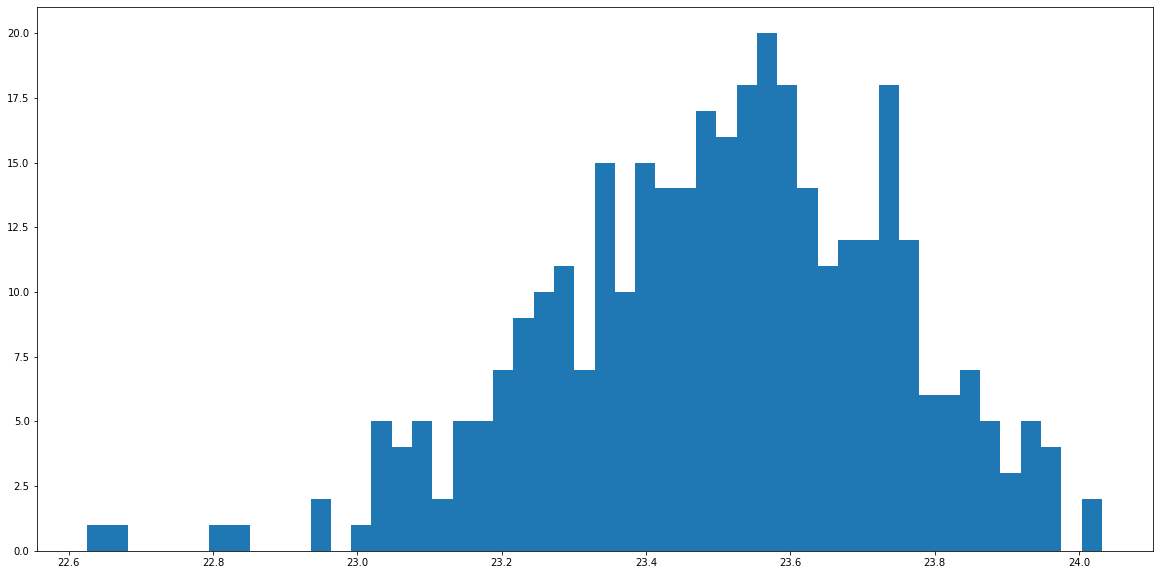

In [125]:
bin_heights,bin_borders, _ = plt.hist(ag,bins=50,label= 'a')


In [126]:
bin_centers = bin_borders[:-1]+np.diff(bin_borders)/2
popt, _ = curve_fit(gaussian,bin_centers,bin_heights, p0 = [1.,0.,1.]) 

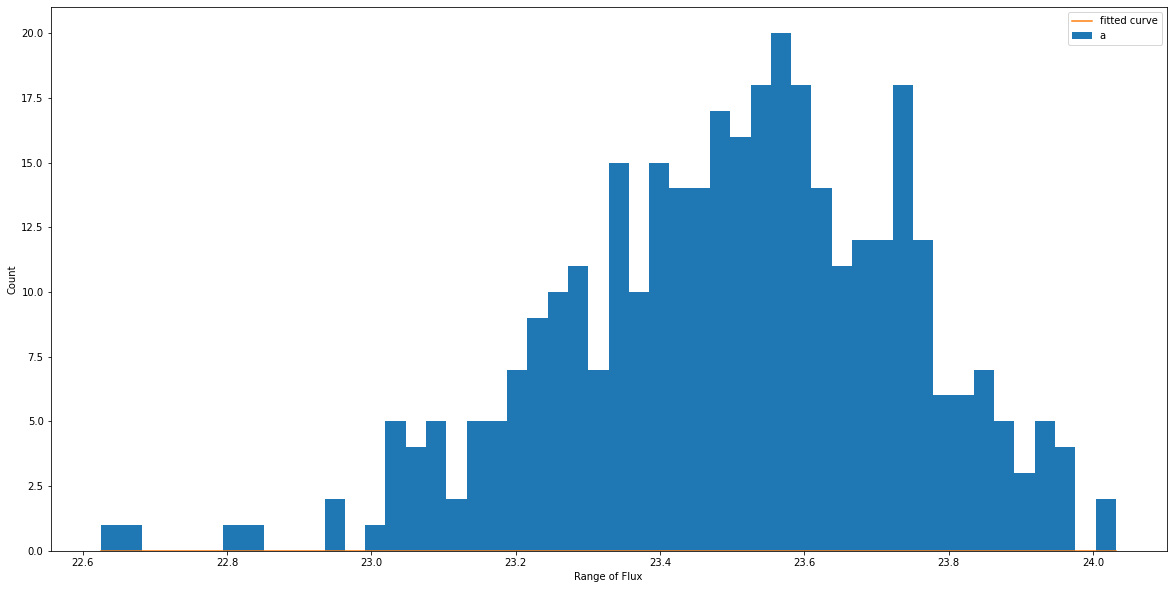

In [127]:
x_interval_for_fit = np.linspace(bin_borders[0],bin_borders[-1],100)
plt.xlabel('Range of Flux')
plt.ylabel('Count')
plt.hist(ag,bins=50,label= 'a')
plt.plot(x_interval_for_fit,gaussian(x_interval_for_fit,*popt),label = 'fitted curve')
plt.legend()


In [ ]:
print('Mean, Peak count & Standard deviation',popt)

Mean, Peak count & Standard deviation [ 0.3049391  16.88797286  0.24466194]


In [ ]:
plt.xlabel('range')
plt.ylabel('Freq')
plt.show()

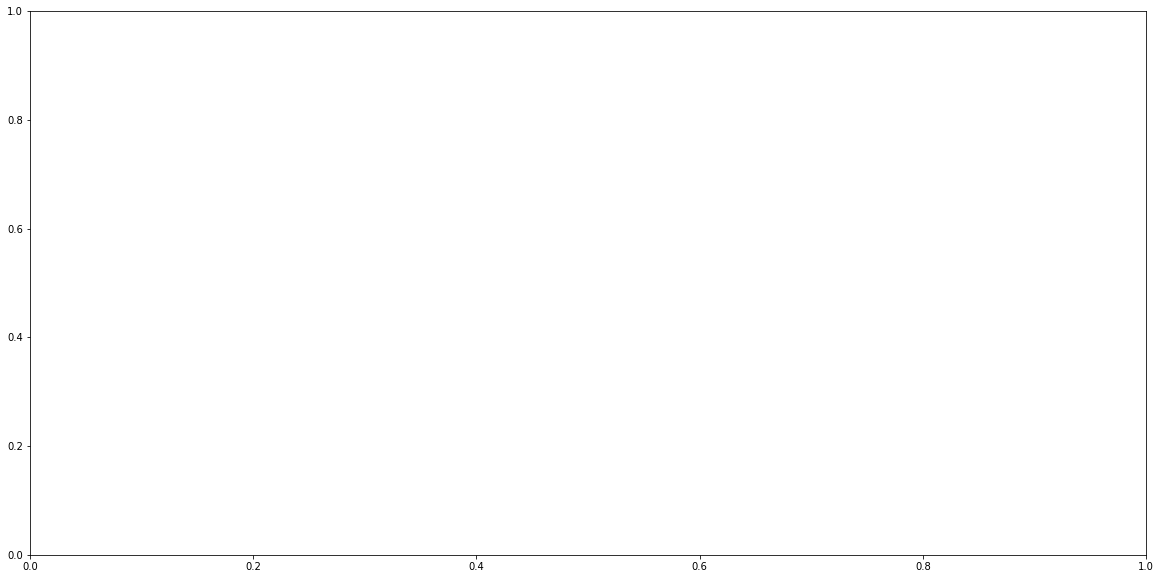

In [10]:
from scipy.stats import lognorm
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1)

In [33]:
s = ag.std()

#mean, var, skew, kurt = lognorm.stats(s, moments='mvsk')


In [34]:
x = np.linspace(lognorm.ppf(0.01, s),
                lognorm.ppf(0.99, s), 100)
ax.plot(x, lognorm.pdf(x, s),'r-', lw=5, alpha=0.6, label='lognorm pdf')

In [14]:
rv = lognorm(s)
ax.plot(x, rv.pdf(x), 'k-', lw=2, label='frozen pdf')

In [15]:
vals = lognorm.ppf([0.001, 0.5, 0.999], s)
np.allclose([0.001, 0.5, 0.999], lognorm.cdf(vals, s))
True

True

In [16]:
r = lognorm.rvs(s, size=1000)

In [19]:
ax.hist(r, density=True, histtype='stepfilled', alpha=0.2)
ax.legend(loc='best', frameon=False)
plt.show()

In [ ]:
m = ag.mean()
c=lognorm(m,s)
plt.plot(c)

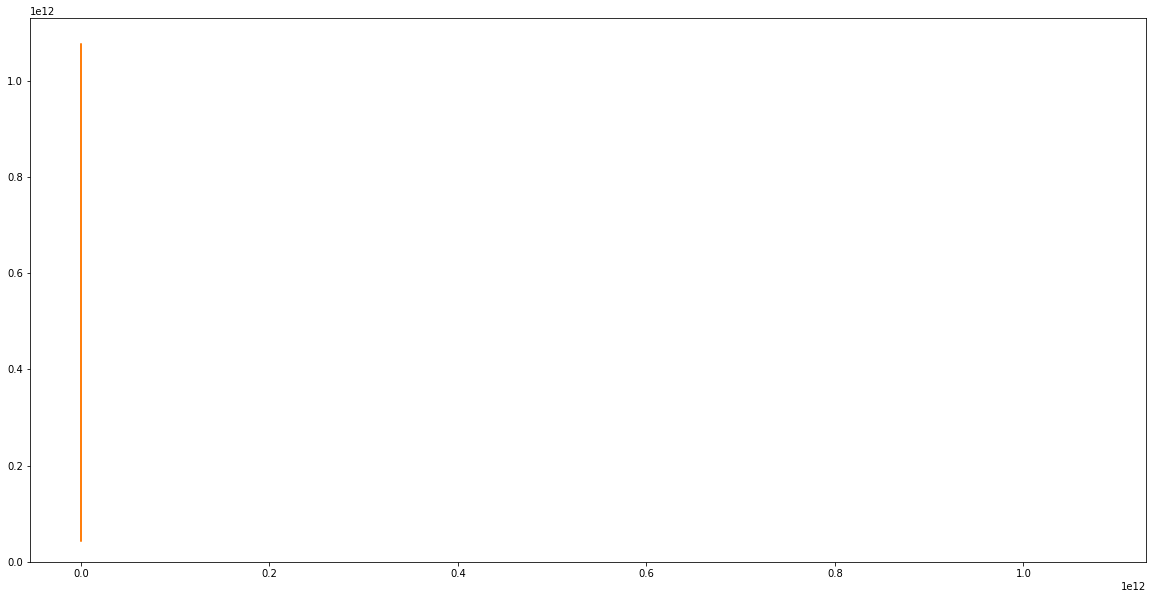

In [89]:
# plot histogram in log space

plt.hist(g, bins=50)
#plt.set_xscale("log")

shape,loc,scale = lognorm.fit(g)

print (shape, loc, scale)

pdf = scipy.stats.lognorm.fit(g, shape, loc, scale)
plt.plot(g,pdf)

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import lognorm

g = agn['FLUX']*1000000

s, loc, scale = stats.lognorm.fit(g, floc=0)

In [12]:
estimated_mu = np.log(scale)
estimated_sigma = s

In [35]:
print(estimated_mu,s)

-1.1430532288976782 0.5468352128871027


In [38]:
g.count()

351

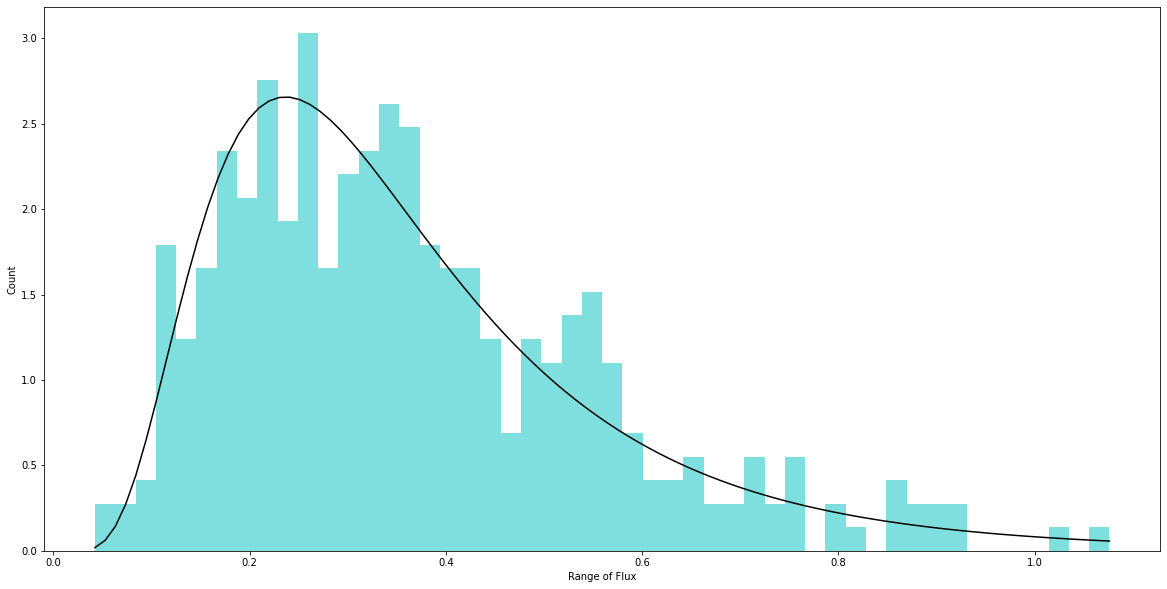

In [53]:

plt.xlabel('Range of Flux')
plt.ylabel('Count')
plt.hist(g, bins=50, density=True, color='c', alpha=.5, label = 'Histogram')
xmin = g.min()
xmax = g.max()
x = np.linspace(xmin, xmax, 100)
pdf = stats.lognorm.pdf(x, s, scale=scale)
plt.plot(x,pdf, 'k',label = 'fitted')

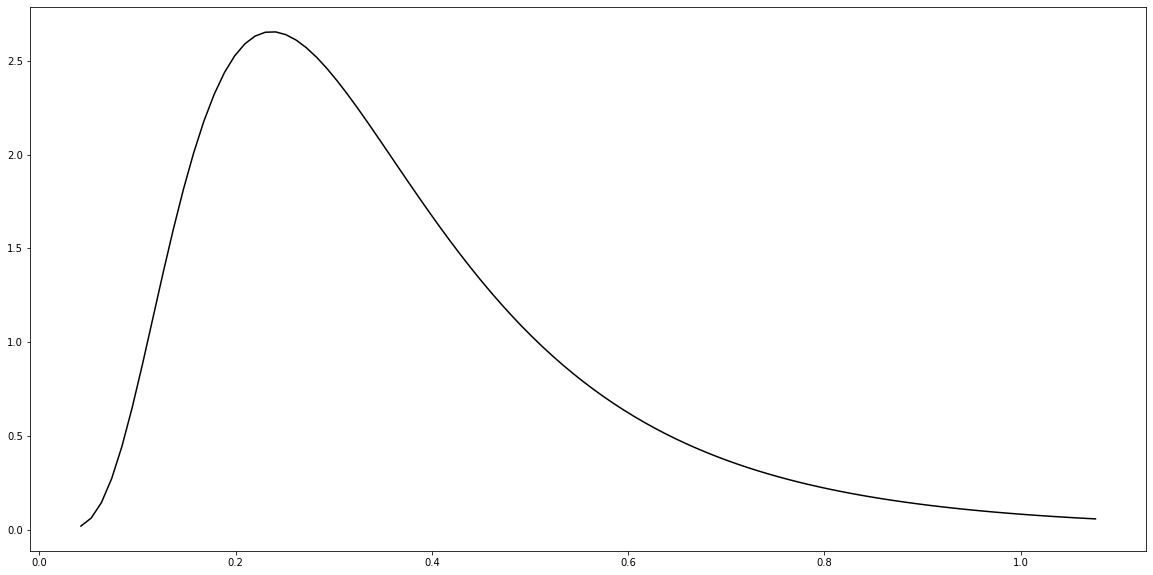

In [57]:
plt.plot(x,pdf, 'k',label = 'fitted')

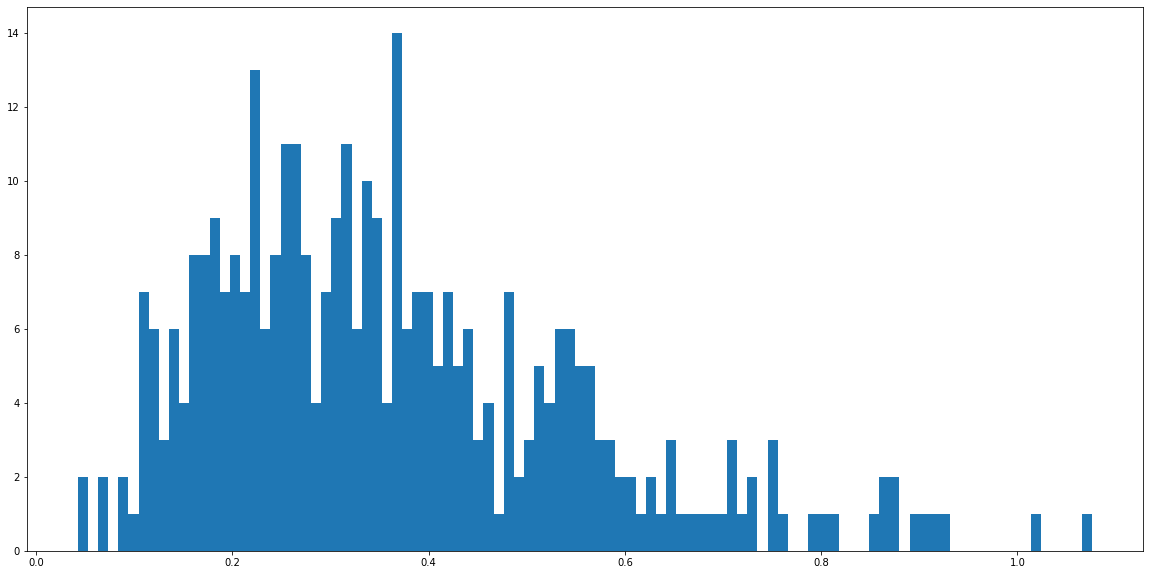

In [54]:
h = plt.hist(g,bins = 100)

In [21]:
from scipy.stats import chisquare
scipy.stats.chisquare(x, pdf)


Power_divergenceResult(statistic=268.6661310539307, pvalue=1.3509512370854878e-17)

In [48]:
print(x)

100

In [34]:
print(pdf)

[0.01864878 0.06134742 0.14399454 0.27221467 0.44376471 0.65047727
 0.88098734 1.12312067 1.36555086 1.59873419 1.81528605 2.00998652
 2.17957183 2.3224251  2.43823969 2.52769826 2.59218964 2.63357188
 2.6539821  2.65568931 2.64098449 2.61210151 2.57116302 2.52014575
 2.46086076 2.39494474 2.32385927 2.24889577 2.17118413 2.09170365
 2.0112953  1.93067444 1.85044354 1.77110446 1.69307009 1.61667518
 1.54218631 1.46981096 1.39970565 1.33198326 1.2667195  1.20395868
 1.14371871 1.08599555 1.03076702 0.97799613 0.92763399 0.87962224
 0.83389518 0.79038161 0.7490063  0.70969134 0.67235717 0.63692355
 0.60331025 0.57143768 0.54122742 0.51260259 0.48548816 0.45981122
 0.43550116 0.41248978 0.3907114  0.37010291 0.35060378 0.33215609
 0.31470447 0.29819608 0.28258056 0.26780997 0.25383871 0.24062347
 0.22812312 0.21629863 0.20511302 0.19453124 0.18452009 0.17504818
 0.16608576 0.15760474 0.14957854 0.14198203 0.13479148 0.12798447
 0.12153982 0.11543753 0.10965871 0.10418553 0.09900118 0.0940

In [64]:
c=h[1][:-1]

In [66]:
scipy.stats.chisquare(c, x)


Power_divergenceResult(statistic=0.004805221908666107, pvalue=1.0)